## **mnist, fmnist, cifar-10 순으로 간단한 CNN 모델의 성능(정확도)이 낮아지는 이유를 설명하시오.**

* 1. mnist, fmnist, cifar-10 순으로 데이터가 복잡해진다. mnist가 가장 단순한 dataset이기 때문에 간단한 CNN 모델의 성능도 높게 나타날 수 있다.

* 2. 모델이 높은 variance와 낮은 bias를 가질 때, 일부는 정확하게 매핑되지만 많은 데이터가 정확하게 예측하지 못한다.
모델을 너무 tight하게 학습하여 데이터가 조금만 변해도(ex. 노이즈), 모델이 매우 다른 결과를 내놓기 때문이다.

* - 예를들어, 어떤 모델에 대한 결과가 Train-data set에서는 정확도가 80%, Test-data set에서는 78%가 나왔으면 이 모델은 성능은 그다지 좋지 않지만(Bias가 크지만), 새로운 데이터가 들어와도 어느정도 성능이 유지되는(Variance가 작은) 모델인 것이다.


* 3. dataset을 학습 시킬 때 mnist, fmnist, cifar-10 순으로 손실양이 크다. 특히 cifar-10을 학습할 때 정확도가 높게 측정되더라도 손실되는 양이 크게 나타난다. mnist, fmnist에 비해 cifar-10의 손실량이 가장 크기 때문에 간단한 CNN 모델의 성능도 낮게 나타날 것이다.

# **CNN model of cifar-10 dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: Find the best model
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

### CIFAR-10 Dataset (CIFAR: Canadian Institute For Advanced Research)
> https://www.cs.toronto.edu/~kriz/cifar.html

- (50000, 32, 32, 3), train
- (10000, 32, 32, 3), test
- color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc
> class names
> - ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

- 참고 문헌  

> https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8  

> https://becominghuman.ai/convolutional-neural-networks-cnns-convnets-for-visual-recognition-cae879a70f1a

> https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

### Search the best model of C2F2
* callback
* Early stopping
* model checkpoint

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

### 데이터 로딩, 정규화

In [ ]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

170500096/170498071 [==============================] - 2s 0us/step
X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
* one random image
* 10 representative images

44963


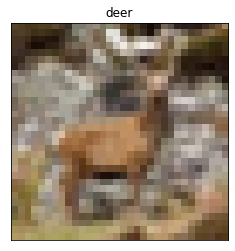

In [ ]:
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

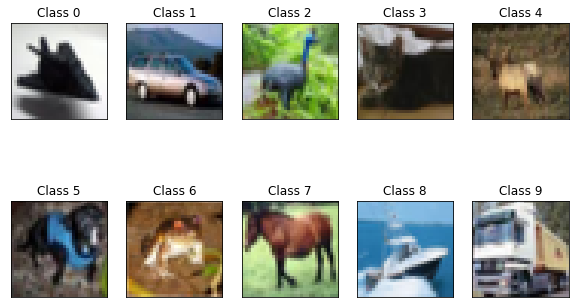

In [ ]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])


## Design CNN
### import models, layers, callbacks
* models: Sequential
* layers: Conv2D, MaxPool2D, Flatten
* callbacks: ModelCheckpoint, EarlyStopping

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation, Dense, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.normalization import BatchNormalization

In [ ]:
batch_size = 32
num_classes = 10
epoch = 500

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)       

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
hist = model.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4145 - accuracy: 0.5077 - val_loss: 0.9657 - val_accuracy: 0.6587
Epoch 2/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9829 - accuracy: 0.6515 - val_loss: 0.8442 - val_accuracy: 0.7002
Epoch 3/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8508 - accuracy: 0.7007 - val_loss: 0.8125 - val_accuracy: 0.7172
Epoch 4/500
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7686 - accuracy: 0.7315 - val_loss: 0.8080 - val_accuracy: 0.7201
Epoch 5/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7035 - accuracy: 0.7554 - val_loss: 0.6602 - val_accuracy: 0.7697
Epoch 6/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6575 - accuracy: 0.7713 - val_loss: 0.6660 - val_accuracy: 0.7737
Epoch 7/500
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6127 - accuracy: 0.7839 - val_loss: 0.6701 - val_ac

In [ ]:
model.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 3ms/step - loss: 0.5404 - accuracy: 0.8497


[0.5404079556465149, 0.8496999740600586]

## Hidden layer에 따른 정확도

In [ ]:
score=model.evaluate(X_test, y_test, batch_size = 32)

losses = [score[0]]
accuracies= [score[1]]
losses,accuracies

313/313 [==============================] - 1s 3ms/step - loss: 0.5404 - accuracy: 0.8497


([0.5404079556465149], [0.8496999740600586])

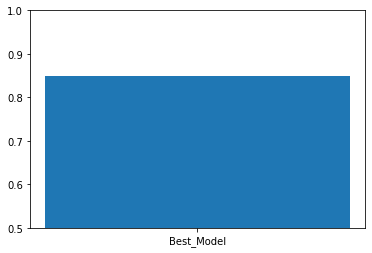

In [ ]:
x = np.arange(1)
cnns = ['Best_Model']

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((.5,1.0))
plt.show()

## Graph of loss and accuracy

In [ ]:
epoch = 78
hist = model.fit(X_train, y_train, 
         epochs = epoch, 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/78
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1771 - accuracy: 0.9393 - val_loss: 0.5575 - val_accuracy: 0.8468
Epoch 2/78
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1837 - accuracy: 0.9358 - val_loss: 0.5491 - val_accuracy: 0.8479
Epoch 3/78
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1770 - accuracy: 0.9394 - val_loss: 0.5613 - val_accuracy: 0.8462
Epoch 4/78
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1759 - accuracy: 0.9384 - val_loss: 0.5706 - val_accuracy: 0.8510
Epoch 5/78
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1744 - accuracy: 0.9396 - val_loss: 0.5878 - val_accuracy: 0.8456
Epoch 6/78
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1731 - accuracy: 0.9398 - val_loss: 0.5667 - val_accuracy: 0.8479
Epoch 7/78
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1739 - accuracy: 0.9403 - val_loss: 0.5452 - val_accuracy:

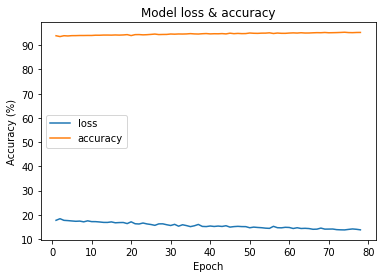

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = epoch
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

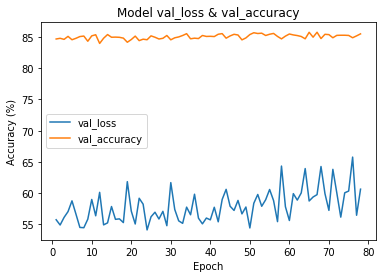

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

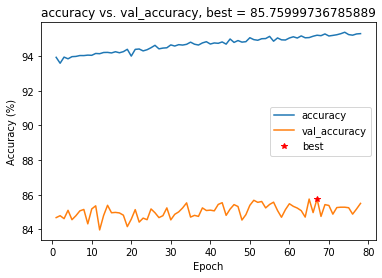

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.title('accuracy vs. val_accuracy, best = ' +str(vacc_list[np.argmax(np.array(vacc_list))]))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best']) #, loc='center bottom')

## 모형의 저장
* 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
* load 명령으로 불러 사용

In [ ]:
from keras.models import load_model

model = load_model('cifar10_best_weights.053-0.8498.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.5173 - accuracy: 0.8498


[0.5172975659370422, 0.8497999906539917]

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [ ]:
cm = confusion_matrix(y_test0, predictions0)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

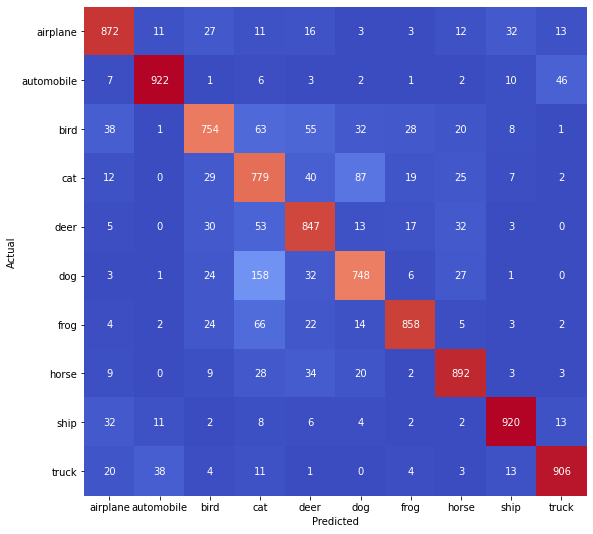

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 이전 모델의 성능(74%)보다 위 모델의 성능(85%)이 훨씬 높게 나타난 것을 확인할 수 있다!